In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading csv files
hourly_df = pd.read_csv("hourly_data.csv").drop(columns=['time_hour'])
weekly_df = pd.read_csv("weekly_data.csv").drop(columns=['time_week'])
monthly_df = pd.read_csv("monthly_data.csv").drop(columns=['time_month'])

In [3]:
# extracting year, month and day for weekly dataframe
weekly_df['year_weeklyDf'] = pd.DatetimeIndex(weekly_df['date']).year
weekly_df['month_weeklyDf'] = pd.DatetimeIndex(weekly_df['date']).month
weekly_df['day_weeklyDf'] = pd.DatetimeIndex(weekly_df['date']).day

In [4]:
# extracting year, month and day for monthly dataframe
monthly_df['year_monthlyDf'] = pd.DatetimeIndex(monthly_df['date']).year
monthly_df['month_monthlyDf'] = pd.DatetimeIndex(monthly_df['date']).month
monthly_df['day_monthlyDf'] = pd.DatetimeIndex(monthly_df['date']).day

In [5]:
# creating index from year and month for weekly and monthly and hourly dataframes
weekly_df['index']=(weekly_df['year_weeklyDf'].astype('str')+"-"+weekly_df['month_weeklyDf'].astype('str'))
monthly_df['index']=(monthly_df['year_monthlyDf'].astype('str')+"-"+monthly_df['month_monthlyDf'].astype('str'))
weekly_df.set_index('index', inplace=True)
monthly_df.set_index('index', inplace=True)

hourly_df['date_hourlyDf']=hourly_df['index']=pd.to_datetime(hourly_df['date']).dt.date.astype('str')
hourly_df['time_hourlyDf']=pd.to_datetime(hourly_df['date']).dt.time
hourly_df.set_index('index', inplace=True)

In [6]:
# merging weekly and monthly dataframes based on year and month (index column)
result2 = pd.merge(weekly_df , monthly_df, on='index')

# changing index of result3 df to the complete date from weekly df so that we can merge it with hourly dataframe
result2['index']=result2['date_x']
result2.set_index('index', inplace=True)

result3 = pd.merge(result2, hourly_df ,on='index')
result3.reset_index(inplace=True)

<AxesSubplot: >

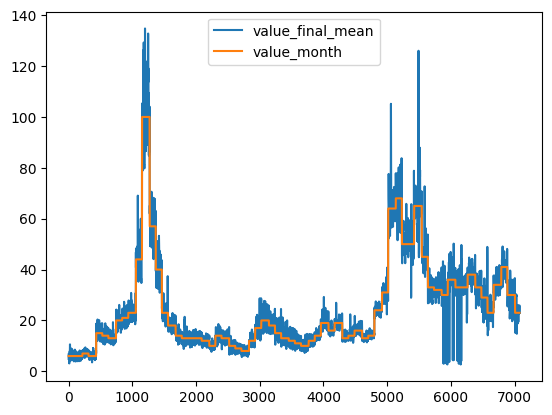

In [7]:
# rescaling try1
# assuming the mean value of measurements have been recorded for the the hourly and weekly measurements
temp1_df = result3.groupby(['date_hourlyDf'])['value_hour'].mean()
result4 = pd.merge(result3, temp1_df, on='date_hourlyDf')

temp2_df = result4.groupby(['date_x'])['value_week'].mean()
result5 = pd.merge(result4, temp2_df, on='date_x')

# calculating the final values based on above calculated mean 
result5['value_final_mean']= (result5['value_week_x']*result5['value_month']*result5['value_hour_x'])/(result5['value_hour_y']*result5['value_week_y'])

# plotting the final values against monthly measurements. as seen in the figure, there some values higher than 100. 
result5[['value_final_mean','value_month']].plot()

<AxesSubplot: >

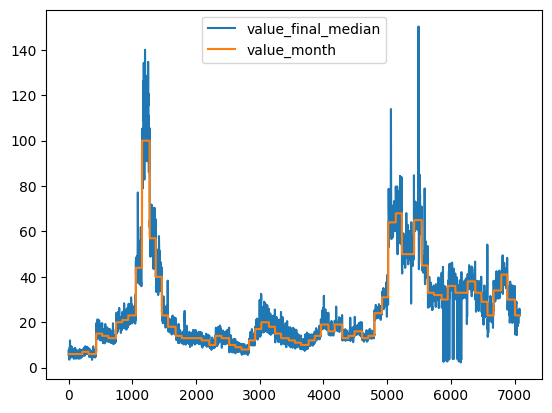

In [8]:
# rescaling try2
# assuming the median value of measurements have been recorded for the the hourly and weekly measurements
temp3_df = result3.groupby(['date_hourlyDf'])['value_hour'].median()
result6 = pd.merge(result3, temp3_df, on='date_hourlyDf')
temp4_df = result6.groupby(['date_x'])['value_week'].median()
result7 = pd.merge(result6, temp4_df, on='date_x')

# calculating the final values based on above calculated median 
result7['value_final_median']= (result7['value_week_x']*result7['value_month']*result7['value_hour_x'])/(result7['value_hour_y']*result7['value_week_y'])

# plotting the final values against monthly measurements. as seen in the figure, there are still some values higher than 100. 
result7[['value_final_median','value_month']].plot()

<AxesSubplot: >

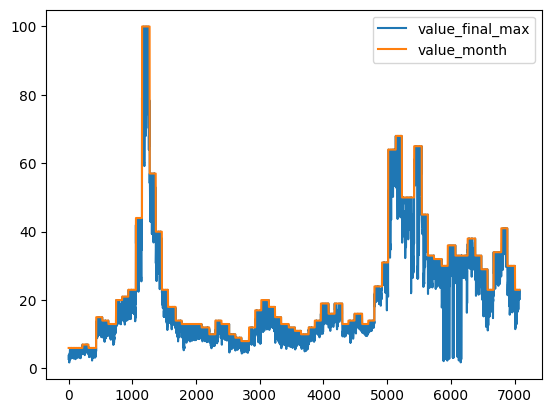

In [9]:
# rescaling try3
# assuming the max value of measurements have been recorded for the the hourly and weekly measurements
temp5_df = result3.groupby(['date_hourlyDf'])['value_hour'].max()
result8 = pd.merge(result3, temp5_df, on='date_hourlyDf')
temp6_df = result6.groupby(['date_x'])['value_week'].max()
result9 = pd.merge(result8, temp6_df, on='date_x')

# calculating the final values based on above calculated max 
result9['value_final_max']= (result9['value_week_x']*result9['value_month']*result9['value_hour_x'])/(result9['value_hour_y']*result9['value_week_y'])

# plotting the final values against monthly measurements. as seen in the below figure, the results are more acceptable than two other rescaling measures.
result9[['value_final_max','value_month']].plot()